In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [53]:
df=pd.read_csv("linearreg.csv",names=["Sex","Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"
])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [64]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [55]:
#question 1a- creating dummy columns for sex
df_dummy=pd.get_dummies(df)

In [56]:
df_dummy.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [57]:
X=df_dummy.drop("Rings",axis=1)
y=df_dummy["Rings"]
X.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0


In [58]:
from sklearn import preprocessing
# Create the Scaler object
scaler = preprocessing.StandardScaler(with_mean=True, with_std=True)
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns=names=["Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight",
                                          "Sex_F","Sex_I","Sex_M"]

In [78]:
scaled_df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,-0.674834,-0.688018,1.316677
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.674834,-0.688018,1.316677
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,1.481846,-0.688018,-0.759488
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,-0.674834,-0.688018,1.316677
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.674834,1.453451,-0.759488


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(scaled_df,y,test_size=0.20,random_state=3250)

In [60]:
#Question 1B- Standarizing the data
for var in X_train.columns:
    #print(var)
    mean=X_train[var].mean()
    std=X_train[var].std()
    X_train[var]=(X_train[var]-mean)/std
    
    
#Question 1B- Standarizing the data
for var in X_test.columns:
    #print(var)
    mean=X_train[var].mean()
    std=X_train[var].std()
    X_test[var]=(X_test[var]-mean)/std

In [61]:
#Question 1B- Standarizing the data
for var in scaled_df.columns:
    print(var)
    print("mean after standarization %3.3f" % scaled_df[var].mean())
    print("std after standarization %3.3f"% scaled_df[var].std())
    

Length
mean after standarization -0.000
std after standarization 1.000
Diameter
mean after standarization -0.000
std after standarization 1.000
Height
mean after standarization 0.000
std after standarization 1.000
Whole weight
mean after standarization 0.000
std after standarization 1.000
Shucked weight
mean after standarization -0.000
std after standarization 1.000
Viscera weight
mean after standarization -0.000
std after standarization 1.000
Shell weight
mean after standarization 0.000
std after standarization 1.000
Sex_F
mean after standarization -0.000
std after standarization 1.000
Sex_I
mean after standarization -0.000
std after standarization 1.000
Sex_M
mean after standarization -0.000
std after standarization 1.000


In [62]:
X_arr=X_train.values
itercept=np.ones((X_arr.shape[0], 1))
X_arr=np.concatenate((X_arr, itercept), axis=1)
X_arr.shape

(3341, 11)

In [63]:
X_test=X_test.values
itercept=np.ones((X_test.shape[0], 1))
X_test=np.concatenate((X_test, itercept), axis=1)
X_test.shape

(836, 11)

(3341, 11)

In [64]:
def mylinridgereg(X,y,lambdaa):
    X_dash=np.transpose(X)
    X_dash_X=X_dash.dot(X)
    I= np.identity(X_dash_X.shape[0])
    w=np.linalg.inv((X_dash_X+lambdaa*I)).dot(X_dash).dot(y)
    return w
    

In [65]:
w=mylinridgereg(X_arr,y_train,1.01)
w=w.flatten()


In [66]:
def mylinridgeregeval(X, weights):
    predited_y=X.dot(weights)
    return predited_y

In [67]:
 predited_y_test=mylinridgeregeval(X_test, w)

In [68]:
def meansquarederr(T, Tdash):
    mse = (np.square(T - Tdash)).mean(axis=0)
    return mse

In [69]:
from sklearn.metrics import mean_squared_error
mse=meansquarederr(y_test, predited_y_test)
mse

5.611016184190003

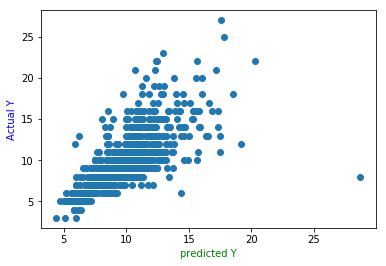

In [77]:
#question 1H best model with test_size=0.2 and lambda=1.01
#plotting scatter plot 
plt.scatter(predited_y_test,y_test)
plt.xlabel("predicted Y",color='g')
plt.ylabel("Actual Y",color='b')
plt.gray()
plt.show()

In [91]:
#question 1d
lambda_list=np.arange(0.01,10,1)
mse_test_list=list()
mse_train_list=list()
weights=list()
for lambdaa in lambda_list:
    w=mylinridgereg(X_arr,y_train,lambdaa)
    weights.append(w)
    predicted_test_y=mylinridgeregeval(X_test, w)
    predicted_train_y=mylinridgeregeval(X_arr, w)
    mse_test=meansquarederr(y_test, predicted_test_y)
    mse_test_list.append(mse_test)
    mse_train=meansquarederr(y_train, predicted_train_y)
    mse_train_list.append(mse_train)
    

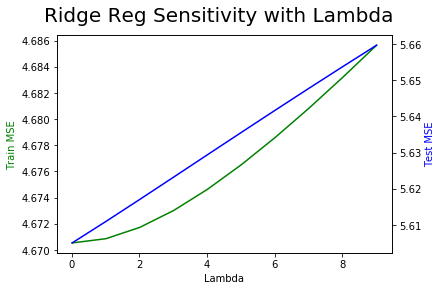

In [92]:
#question 1d
from matplotlib import *
import sys
from pylab import *
fig = plt.figure()
fig.suptitle('Ridge Reg Sensitivity with Lambda', fontsize=20)
ax1 = fig.add_subplot(111)

ax2 = ax1.twinx()
ax1.plot(lambda_list, mse_train_list, 'g-')
ax2.plot(lambda_list, mse_test_list, 'b-')

ax1.set_xlabel('Lambda')
ax1.set_ylabel('Train MSE', color='g')
ax2.set_ylabel('Test MSE', color='b')

plt.show()

In [93]:
#Question 1e
import numpy as np
min_train_index= np.argmin(mse_train_list)
min_test_index= np.argmin(mse_test_list)

print("lambda with min Train MSE",lambda_list[min_train_index])
print("lambda with min Test MSE",lambda_list[min_test_index])



lambda with min Train MSE 0.01
lambda with min Test MSE 0.01


In [106]:
min(mse_test_list)

5.6050787586634465

In [94]:
significant_wts=weights[min_test_index]
significant_wts

array([ 0.13574256,  0.62457253,  0.87174463,  4.13112642, -4.22106434,
       -1.23046732,  1.25230328,  0.10992782, -0.26392056,  0.15116357,
        9.90987755])

In [95]:
columns=X_train.columns
columns=columns.tolist()
columns.append("intercept")

In [98]:
#Significance of variables
parameter_coeff=np.vstack((columns,abs(significant_wts)))
parameter_coeff=np.transpose(parameter_coeff)
Variable_importance = parameter_coeff[parameter_coeff[:,1].argsort()[::-1]]
print("Variable importance are- \n",Variable_importance)

Variable importance are- 
 [['intercept' '9.909877551997747']
 ['Shucked weight' '4.22106433956299']
 ['Whole weight' '4.131126421841506']
 ['Shell weight' '1.2523032840887554']
 ['Viscera weight' '1.2304673175518417']
 ['Height' '0.8717446339193282']
 ['Diameter' '0.62457252758646']
 ['Sex_I' '0.26392056124281676']
 ['Sex_M' '0.1511635732121087']
 ['Length' '0.13574256217542313']
 ['Sex_F' '0.10992782440138774']]


In [100]:
scaled_df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,-0.674834,-0.688018,1.316677
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.674834,-0.688018,1.316677
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,1.481846,-0.688018,-0.759488
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,-0.674834,-0.688018,1.316677
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.674834,1.453451,-0.759488


In [109]:
# 1D removing Sex_M, Length, Sex_F and running the model
scaled_df_trim=scaled_df.drop(['Length','Sex_F'],axis=1)
from sklearn.model_selection import train_test_split
X_train_trim, X_test_trim, y_train_trim, y_test_trim= train_test_split(scaled_df_trim,y,test_size=0.20,random_state=3250)

#adding intercept term
X_train_trim=X_train_trim.values
itercept=np.ones((X_train_trim.shape[0], 1))
X_train_trim=np.concatenate((X_train_trim, itercept), axis=1)
X_train_trim.shape

X_test_trim=X_test_trim.values
itercept=np.ones((X_test_trim.shape[0], 1))
X_test_trim=np.concatenate((X_test_trim, itercept), axis=1)
X_test_trim.shape

#training and predicitng 

w=mylinridgereg(X_train_trim,y_train_trim,0.01)
predicted_test_y=mylinridgeregeval(X_test_trim, w)
predicted_train_y=mylinridgeregeval(X_train_trim, w)
mse_test=meansquarederr(y_test, predicted_test_y)

mse_train=meansquarederr(y_train, predicted_train_y)


print("Train MSE while removing least significant variables",mse_train)
print("Test MSE while removing least significant variables",mse_test)



Train MSE while removing least significant variables 4.670986070326347
Test MSE while removing least significant variables 5.688067212936557


In [28]:
#Question 1F
from sklearn.model_selection import train_test_split
def remove_random_bias(test_size):
    lambda_list=np.arange(0.01,10,1)
    random_state_list=[1132,	1212,	212,	455,	235,	124,	1455,	1233,	1678,	1235,	
     2264,	2424,	424,	910,	470,	248,	2910,	2466,	3356,	2470,	32,	12,	56,	45,	888]
    mse_test_list=list()
    mse_train_list=list()
    mse_test_avg_list=list()
    mse_train_avg_list=list()
    weights=list()
    for lambdaa in lambda_list:
        for random_state in random_state_list:
            X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=test_size,random_state=random_state)     
            
            for var in X_train.columns:
                mean=X_train[var].mean()
                std=X_train[var].std()
                X_train[var]=(X_train[var]-mean)/std
                X_test[var]=(X_test[var]-mean)/std
                
            X_train=X_train.values
            itercept=np.ones((X_train.shape[0], 1))
            X_train=np.concatenate((X_train, itercept), axis=1)
            
            X_test=X_test.values
            itercept=np.ones((X_test.shape[0], 1))
            X_test=np.concatenate((X_test, itercept), axis=1)
                
            w=mylinridgereg(X_train,y_train,lambdaa)
            weights.append(w)
            predicted_test_y=mylinridgeregeval(X_test, w)
            predicted_train_y=mylinridgeregeval(X_train, w)
            mse_test=meansquarederr(y_test, predicted_test_y)
            mse_test_list.append(mse_test)
            mse_train=meansquarederr(y_train, predicted_train_y)
            mse_train_list.append(mse_train)
        
        mse_test_avg_list.append(np.mean(mse_test_list))
        mse_train_avg_list.append(np.mean(mse_train_list))
    return (lambda_list,mse_train_avg_list,mse_test_avg_list)
            

In [51]:
test_size=0.3
lambdaa,train_mse,test_mse=remove_random_bias(test_size)

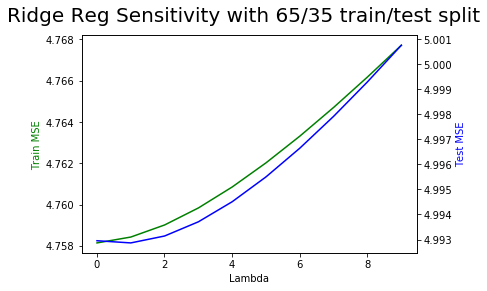

In [47]:
#question 1F
from matplotlib import *
import sys
from pylab import *
fig = plt.figure()
fig.suptitle('Ridge Reg Sensitivity with 65/35 train/test split', fontsize=20)
ax1 = fig.add_subplot(111)

ax2 = ax1.twinx()
ax1.plot(lambdaa, train_mse, 'g-')
ax2.plot(lambdaa, test_mse, 'b-')

ax1.set_xlabel('Lambda')
ax1.set_ylabel('Train MSE', color='g')
ax2.set_ylabel('Test MSE', color='b')

plt.show()

In [52]:
#Question 1G
import numpy as np
min_test_index= np.argmin(test_mse)
min_test_mse=test_mse[min_test_index]
min_lambdaa=lambdaa[min_test_index]
print(test_size)
print(min_lambdaa)
print(min_test_mse)

0.3
0.01
4.980757084346844


In [53]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1,solver='cholesky',fit_intercept=False)
ridge.fit(X_arr,y_train)


Ridge(alpha=0.1, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [27]:
print(lambdaa,train_mse,test_mse)

[0.01 1.01 2.01 3.01 4.01 5.01 6.01 7.01 8.01 9.01] [103.62707726357621, 103.62726248227521, 103.62765079392962, 103.62820650554221, 103.6289004797051, 103.62970879224416, 103.63061169660759, 103.63159281758682, 103.63263851828492, 103.63373739922827] [103.72394305553051, 103.72127521812139, 103.7189806327725, 103.71700596172664, 103.71530689970787, 103.71384639996629, 103.71259329581342, 103.71152121940565, 103.71060774631441, 103.70983371328761]


In [54]:
sk_predict_y_test=ridge.predict(X_test)
ridge.coef_

array([ 0.13577479,  0.62435329,  0.87186461,  4.11447297, -4.21310865,
       -1.22651393,  1.25755986,  0.10998623, -0.26397695,  0.15116217,
        9.90961061])

In [27]:
w

array([ 0.14254131,  0.60286351,  0.88185834,  2.93311633, -3.63288888,
       -0.94725268,  1.61531409,  0.11464946, -0.26831022,  0.15088565,
        9.88325408])

In [55]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,sk_predict_y_test)

5.60560531829612